# Conexion con la base de datos


In [ ]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import mysql.connector

In [ ]:
# Configuración de la conexión
host = 
user = 
password = 
database = 
port = 3306

try:
    # Establecer la conexión
    conexion = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database,
        port=port
    )

    if conexion.is_connected():
        print("Conexión exitosa a la base de datos")

except mysql.connector.Error as error:
    print("Error al conectarse a la base de datos: {}".format(error))


Conexión exitosa a la base de datos


In [ ]:
# Ver las tablas que contiene
# Crear un cursor para ejecutar consultas
cursor = conexion.cursor()

# Consulta para obtener la lista de tablas
consulta_tablas = "SHOW TABLES"

# Ejecutar la consulta
cursor.execute(consulta_tablas)

# Obtener los resultados
tablas = cursor.fetchall()

# Mostrar las tablas
print("Tablas disponibles:")
for tabla in tablas:
    print(tabla[0])

Tablas disponibles:
allergens
families
menu_pick_up_times
menu_recipes
menu_type_families
menu_types
menus
migrations
options
order_item_adaptions
order_items
orders
pick_up_points
pick_up_times
recipe_allergens
recipe_options
recipes
slots
subscription_allergens
subscription_options
subscriptions
users


In [ ]:
# Convertir los datos en dataframe
import pandas as pd

recipes =  pd.read_sql("SELECT * FROM recipes", conexion,  index_col= 'id')
orders = pd.read_sql ("SELECT * FROM orders", conexion, index_col='id')
order_items = pd.read_sql("SELECT * FROM order_items", conexion, index_col='id')
pick_up_times = pd.read_sql ("SELECT * FROM pick_up_times", conexion, index_col='id')
pick_up_points = pd.read_sql ("SELECT * FROM pick_up_points", conexion, index_col='id')


<ipython-input-8-c41287d9dde5>:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  recipes =  pd.read_sql("SELECT * FROM recipes", conexion,  index_col= 'id')
<ipython-input-8-c41287d9dde5>:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orders = pd.read_sql ("SELECT * FROM orders", conexion, index_col='id')
<ipython-input-8-c41287d9dde5>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  order_items = pd.read_sql("SELECT * FROM order_items", conexion, index_col='id')
<ipython-input-8-c41287d9dde5>:7: UserWarning: pandas only s

# Conexion a drive

In [ ]:
#Conectar con drive
!pip install -U -q PyDrive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [ ]:
#Ingresar al drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
# Descargar las tablas de la carpeta
folder_id = '1JeRtDk1NrM2a79m9W7fiSAXOSALoFKM0'
files_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()

for file in files_list:
    print('title: %s, id: %s' % (file['title'], file['id']))
    file.GetContentFile(file['title'])  # Descargar archivo


title: Menu_con_recipe_id.csv, id: 1kOjMqqy9bm4449NyyzMfjczFkEwnKzr9
title: order_items.recipe_id.csv, id: 1Ayzzi9Iyy5S3v8OkyEE8vzgehpP2U3-g
title: recipes_202307201106.csv, id: 1T8fH80zrHD5FLTAvBOf5Nl5xs4qx0ViF
title: orders_202307201106.csv, id: 1e9IZO1Y6LoLNDM7bRJwf1sxOi_PmYMy0
title: order_items_202307201106.csv, id: 1dgxNQPD1ijbzSt-NyHbs49yGuAMZw1wz
title: order_item_adaptions_202307201106.csv, id: 1Mkw_EqE5iesN8BtET_865qOJu2v38uZO
title: menus_202307201106.csv, id: 1VS2GaM-t5Q_weO8b2lEK20R568jCBrD1
title: menu_types_202307201106.csv, id: 1p30LcYEd9qR-wOZiDwGse5g3LvOd8KUH
title: menu_type_families_202307201106.csv, id: 11sdjN4DkWLvDbIVyn2Bls-p_lm8a2LHd
title: menu_recipes_202307201106.csv, id: 1tAvzN31RvQcgJ2HsOUAQY-TwDS_j4B8p
title: families_202307201106.csv, id: 19cIEQt5ZiB4zHfDIDbYO10dliM4W9wBg
title: allergens_202307201106.csv, id: 1ZboYt4btU-c7jJiALdfiq8ueP1Ct5LgX
title: users_202307201106.csv, id: 1v60niFyFgklup_zuLZxwW3rcCeOQw5nb
title: subscriptions_202307201106.csv, id: 1

In [ ]:
l
# Convertir los datos en dataframe
import pandas as pd

recipes = pd.read_csv('recipes_202307201106.csv', delimiter=';')
orders = pd.read_csv('orders_202307201106.csv', delimiter=';')
order_items = pd.read_csv('order_items_202307201106.csv', delimiter=';')
order_item_adaptions = pd.read_csv('order_item_adaptions_202307201106.csv', delimiter=';')
menus = pd.read_csv('menus_202307201106.csv',delimiter=';')
menus_types = pd.read_csv('menu_types_202307201106.csv')
menu_type_families = pd.read_csv('menu_types_202307201106.csv', delimiter=';')
menu_recipes = pd.read_csv('menu_recipes_202307201106.csv',delimiter=';')
families = pd.read_csv('families_202307201106.csv',delimiter=';')
allergens = pd.read_csv('allergens_202307201106.csv', delimiter=';')
users = pd.read_csv('users_202307201106.csv', delimiter=';')
subscriptions = pd.read_csv('subscriptions_202307201106.csv', delimiter=';')
subscription_options = pd.read_csv('subscription_options_202307201106.csv', delimiter=';')
subscription_allergens = pd.read_csv('subscription_allergens_202307201106.csv', delimiter=';')
slots = pd.read_csv('slots_202307201106.csv', delimiter=';')
recipe_options = pd.read_csv('recipe_options_202307201106.csv', delimiter=';')
recipe_allergens = pd.read_csv('recipe_allergens_202307201106.csv', delimiter=';')
pick_up_times = pd.read_csv('pick_up_times_202307201106.csv', delimiter=',')
pick_up_points = pd.read_csv('pick_up_points_202307201106.csv', delimiter=',')
menu_pick_up_times = pd.read_csv('menu_pick_up_times_202307201106.csv', delimiter=';')
Menu_con_recipe_id = pd.read_csv('Menu_con_recipe_id.csv', delimiter=',')



# Sección nueva

## Transformacion de tablas

In [ ]:
#Cantidad de registros en orders
len(orders)

2179

In [ ]:
orders = orders.reset_index()


In [ ]:
orders.head(2)

,id,name,user_id,subscription_id,menu_id,notes,pick_up_point_day1_id,pick_up_point_day2_id,created_at,updated_at,amount,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,is_txandapasa
0,315,ORD-46-128-19,46,128,19,None,1,1,2022-11-14 10:48:39,2022-11-27 18:03:19,28.3,1,1,1.0,3.0,NaN
1,316,ORD-85-163-19,85,163,19,None,4,4,2022-11-14 13:39:26,2023-01-05 11:57:59,0.0,1,1,1.0,NaN,NaN


In [ ]:

# Unir dataframe  ordes
datos = orders.merge(order_items, left_on='id', right_on='order_id', how='inner')
datos.head(2)


,id,name_x,user_id,subscription_id,menu_id,notes_x,pick_up_point_day1_id,pick_up_point_day2_id,created_at_x,updated_at_x,...,is_txandapasa,name_y,day,order_id,recipe_id,purchase,is_complement,notes_y,created_at_y,updated_at_y
0,315,ORD-46-128-19,46,128,19,None,1,1,2022-11-14 10:48:39,2022-11-27 18:03:19,...,NaN,OIT-46-128-19-315,day_1,315,109,0,0,None,2022-11-14 10:48:39,2022-11-14 10:48:39
1,315,ORD-46-128-19,46,128,19,None,1,1,2022-11-14 10:48:39,2022-11-27 18:03:19,...,NaN,OIT-46-128-19-315,day_1,315,70,0,0,None,2022-11-14 10:48:39,2022-11-14 10:48:39


In [ ]:
# Seleccionando las columnas deseadas
datos = datos[['id','name_x','pick_up_point_day1_id','pick_up_point_day2_id','created_at_x','delivered_day_1',
              'delivered_day_2','pick_up_time_day_1_id', 'pick_up_time_day_2_id','recipe_id']]

In [ ]:
# Para cada orden se le agrega registros por el orders_items
print(len(datos))
print(len(orders))

12354
2179


In [ ]:
recipes = recipes.reset_index()

In [ ]:
print(recipes.columns)


Index(['id', 'name', 'description', 'family_id', 'permanent', 'is_complement',
       'created_at', 'updated_at', 'is_freezable', 'price', 'report_type'],
      dtype='object')


In [ ]:
# Convertimos las variables claves en el mismo formato para  hacer el merge
datos['recipe_id'] = datos['recipe_id'].astype(str)
recipes['id'] = recipes['id'].astype(str)
# Unir la tabla recipe con datos para saber los nombres de la variable sin agregar registros a la tabla datos
datos = datos.merge(recipes, left_on='recipe_id', right_on='id', how='left')
datos.head(2)



,id_x,name_x,pick_up_point_day1_id,pick_up_point_day2_id,created_at_x,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,recipe_id,...,name,description,family_id,permanent,is_complement,created_at,updated_at,is_freezable,price,report_type
0,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,109,...,Barazki pastela || Pastel de verduras,"Gure nekazarien barazki sofritu pastela, arrau...",2,0,0,2022-09-27 10:30:51,2022-09-27 10:30:51,0,5.0,kitchen
1,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,70,...,Haragi gixatua || Carne guisada,Haragi eta barazki saltsan erregositako txahal...,16,0,0,2022-02-21 22:30:13,2022-09-23 10:51:36,0,8.0,kitchen


In [ ]:
datos.columns

Index(['id_x', 'name_x', 'pick_up_point_day1_id', 'pick_up_point_day2_id',
       'created_at_x', 'delivered_day_1', 'delivered_day_2',
       'pick_up_time_day_1_id', 'pick_up_time_day_2_id', 'recipe_id', 'id_y',
       'name', 'description', 'family_id', 'permanent', 'is_complement',
       'created_at', 'updated_at', 'is_freezable', 'price', 'report_type'],
      dtype='object')

In [ ]:
# Seleccionar las columnas que necesitamos
datos = datos[['id_x', 'name_x', 'pick_up_point_day1_id', 'pick_up_point_day2_id',
       'created_at_x', 'delivered_day_1', 'delivered_day_2',
       'pick_up_time_day_1_id', 'pick_up_time_day_2_id','name','family_id']]



In [ ]:
#Revisar que permanezca la cantidad de registros
len(datos)

12354

In [ ]:
# Vamos a unir la tabla datos con pick_up_point_day1_id, revisemos los datos de la tabla que vamos a unir
pick_up_points

,name,description,created_at,updated_at,slug,logo,favicon,color_primary,color_secondary,color_tertiary,color_light,color_lighter
id,,,,,,,,,,,,
1,Herrera,Gaiztarrokoa zahar etxean // Hogar del jubilad...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
4,Gros,None,2022-10-24 20:28:33,2023-08-21 15:30:25,gros,galtzagorri.png,favicon_galtzagorri.png,#cf0304,#ee6363,#f59494,#ffd1d1,#fbfaff


In [ ]:
pick_up_points = pick_up_points.reset_index()

In [ ]:
# Convertir la columnas claves en el mismo formato
datos['pick_up_point_day1_id'] = datos['pick_up_point_day1_id'].astype(str)
pick_up_points['id'] = pick_up_points['id'].astype(str)

In [ ]:
# Unimos la tabla
datos = datos.merge(pick_up_points,left_on='pick_up_point_day1_id', right_on='id', how ='left',suffixes=('_datos', '_pick_up'))
len(datos)

12354

In [ ]:
datos.head(5)

,id_x,name_x,pick_up_point_day1_id,pick_up_point_day2_id,created_at_x,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,name_datos,...,created_at,updated_at,slug,logo,favicon,color_primary,color_secondary,color_tertiary,color_light,color_lighter
0,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,Barazki pastela || Pastel de verduras,...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
1,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,Haragi gixatua || Carne guisada,...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
2,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,Arroz-Entsalada || Ensalada de Arroz,...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
3,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,Arto-espelta ogia || Pan de maiz y espelta,...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff
4,315,ORD-46-128-19,1,1,2022-11-14 10:48:39,1,1,1.0,3.0,Entsalada mistoa || Ensalada mixta,...,2021-09-06 21:56:28,2023-08-21 14:12:09,herrera,sukalde.png,favicon_sukalde.png,#2667ff,#3f8efc,#87bfff,#add7f6,#fbfaff


In [ ]:
datos.columns

Index(['id_x', 'name_x', 'pick_up_point_day1_id', 'pick_up_point_day2_id',
       'created_at_x', 'delivered_day_1', 'delivered_day_2',
       'pick_up_time_day_1_id', 'pick_up_time_day_2_id', 'name_datos',
       'family_id', 'id', 'name_pick_up', 'description', 'created_at',
       'updated_at', 'slug', 'logo', 'favicon', 'color_primary',
       'color_secondary', 'color_tertiary', 'color_light', 'color_lighter'],
      dtype='object')

In [ ]:
datos = datos[['id_x','name_x','pick_up_point_day2_id','created_at_x','delivered_day_1','delivered_day_2',
               'pick_up_time_day_1_id','pick_up_time_day_2_id','name_pick_up','name_datos','family_id']]

In [ ]:
datos.head(2)

,id_x,name_x,pick_up_point_day2_id,created_at_x,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,name_pick_up,name_datos,family_id
0,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Barazki pastela || Pastel de verduras,2
1,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Haragi gixatua || Carne guisada,16


In [ ]:
#Renombrar las columnas del dataset datos
nombres = {
   'id_x':'Orders_id',
   'name_x':'Orden',
   'pick_up_point_day2_id':'pick_up_point_day2_id',
   'created_at_x':'Fecha',
   'delivered_day_1':'delivered_day_1',
   'delivered_day_2':'delivered_day_2',
   'pick_up_time_day_1_id':'pick_up_time_day_1_id',
   'pick_up_time_day_2_id': 'pick_up_time_day_2_id',
   'name_datos':'Plato',
   'name_pick_up':'pick_up_point_day1_id',
   '"family_id"':'family_id'
}
datos = datos.rename(columns=nombres)


In [ ]:
datos.head(2)

,Orders_id,Orden,pick_up_point_day2_id,Fecha,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,pick_up_point_day1_id,Plato,family_id
0,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Barazki pastela || Pastel de verduras,2
1,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Haragi gixatua || Carne guisada,16


In [ ]:
# Convertimos las variables claves en el mismo formato para  hacer el merge
datos['pick_up_point_day2_id'] = datos['pick_up_point_day2_id'].astype(str)
pick_up_points['id'] = pick_up_points['id'].astype(str)

In [ ]:
# Unir tablas para el nombre del segundo punto de entrega
datos = datos.merge(pick_up_points[['id', 'name']], left_on='pick_up_point_day2_id', right_on='id', how='left', suffixes=('', '_pickUp_Point'))


In [ ]:
datos.head(5)

,Orders_id,Orden,pick_up_point_day2_id,Fecha,delivered_day_1,delivered_day_2,pick_up_time_day_1_id,pick_up_time_day_2_id,pick_up_point_day1_id,Plato,family_id,id,name
0,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Barazki pastela || Pastel de verduras,2,1,Herrera
1,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Haragi gixatua || Carne guisada,16,1,Herrera
2,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Arroz-Entsalada || Ensalada de Arroz,27,1,Herrera
3,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Arto-espelta ogia || Pan de maiz y espelta,17,1,Herrera
4,315,ORD-46-128-19,1,2022-11-14 10:48:39,1,1,1.0,3.0,Herrera,Entsalada mistoa || Ensalada mixta,28,1,Herrera


In [ ]:
# Seleccionar nuevamente las columnenas que necesitamos
datos = datos[['Orders_id','Orden','Fecha','pick_up_time_day_1_id','pick_up_time_day_2_id',
               'Plato','pick_up_point_day1_id','name','family_id']]

In [ ]:
datos = datos.rename(columns={"name": "pick_up_point_day2_id"})


In [ ]:
datos.head(3)

,Orders_id,Orden,Fecha,pick_up_time_day_1_id,pick_up_time_day_2_id,Plato,pick_up_point_day1_id,pick_up_point_day2_id,family_id
0,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Barazki pastela || Pastel de verduras,Herrera,Herrera,2
1,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Haragi gixatua || Carne guisada,Herrera,Herrera,16
2,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Arroz-Entsalada || Ensalada de Arroz,Herrera,Herrera,27


In [ ]:
pick_up_times = pd.read_sql ("SELECT * FROM pick_up_times", conexion)

<ipython-input-49-f46c86275c50>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pick_up_times = pd.read_sql ("SELECT * FROM pick_up_times", conexion)


In [ ]:
pick_up_times.columns

Index(['id', 'name', 'description', 'day', 'created_at', 'updated_at'], dtype='object')

In [ ]:
datos = datos.merge(pick_up_times[['id','name']],left_on='pick_up_time_day_1_id',right_on='id',how='left',suffixes=('','pick_up_times'))

In [ ]:
datos.head(3)

,Orders_id,Orden,Fecha,pick_up_time_day_1_id,pick_up_time_day_2_id,Plato,pick_up_point_day1_id,pick_up_point_day2_id,family_id,id,name,idpick_up_times,namepick_up_times
0,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Barazki pastela || Pastel de verduras,Herrera,Herrera,2,1.0,Recogida Lunes de 18.30 a 20.30,1.0,Recogida Lunes de 18.30 a 20.30
1,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Haragi gixatua || Carne guisada,Herrera,Herrera,16,1.0,Recogida Lunes de 18.30 a 20.30,1.0,Recogida Lunes de 18.30 a 20.30
2,315,ORD-46-128-19,2022-11-14 10:48:39,1.0,3.0,Arroz-Entsalada || Ensalada de Arroz,Herrera,Herrera,27,1.0,Recogida Lunes de 18.30 a 20.30,1.0,Recogida Lunes de 18.30 a 20.30


In [ ]:
datos = datos[['Orders_id','Orden','Fecha','pick_up_time_day_2_id','Plato','pick_up_point_day1_id','pick_up_point_day2_id','namepick_up_times','family_id']]

In [ ]:
datos = datos.rename(columns={"namepick_up_times":"pick_up_time_day_1_id"})

In [ ]:
datos.head(3)

,Orders_id,Orden,Fecha,pick_up_time_day_2_id,Plato,pick_up_point_day1_id,pick_up_point_day2_id,pick_up_time_day_1_id,family_id
0,315,ORD-46-128-19,2022-11-14 10:48:39,3.0,Barazki pastela || Pastel de verduras,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,2
1,315,ORD-46-128-19,2022-11-14 10:48:39,3.0,Haragi gixatua || Carne guisada,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,16
2,315,ORD-46-128-19,2022-11-14 10:48:39,3.0,Arroz-Entsalada || Ensalada de Arroz,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,27


In [ ]:
datos = datos.merge(pick_up_times[['id','name']],left_on='pick_up_time_day_2_id', right_on='id', how='left')

In [ ]:
datos.head(2)

,Orders_id,Orden,Fecha,pick_up_time_day_2_id,Plato,pick_up_point_day1_id,pick_up_point_day2_id,pick_up_time_day_1_id,family_id,id,name
0,315,ORD-46-128-19,2022-11-14 10:48:39,3.0,Barazki pastela || Pastel de verduras,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,2,3.0,Recogida Miercoles de 18.30 a 20:30
1,315,ORD-46-128-19,2022-11-14 10:48:39,3.0,Haragi gixatua || Carne guisada,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,16,3.0,Recogida Miercoles de 18.30 a 20:30


In [ ]:
datos = datos[['Orders_id','Orden','Fecha','Plato','pick_up_point_day1_id','pick_up_point_day2_id','pick_up_time_day_1_id','name','family_id']]

In [ ]:
datos = datos.rename(columns={'name':'pick_up_time_day_2_id'})

In [ ]:
datos.head(5)

,Orders_id,Orden,Fecha,Plato,pick_up_point_day1_id,pick_up_point_day2_id,pick_up_time_day_1_id,pick_up_time_day_2_id,family_id,anio_mes
0,315,ORD-46-128-19,2022-11-14 10:48:39,Barazki pastela || Pastel de verduras,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,2,2022-11
1,315,ORD-46-128-19,2022-11-14 10:48:39,Haragi gixatua || Carne guisada,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,16,2022-11
2,315,ORD-46-128-19,2022-11-14 10:48:39,Arroz-Entsalada || Ensalada de Arroz,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,27,2022-11
3,315,ORD-46-128-19,2022-11-14 10:48:39,Arto-espelta ogia || Pan de maiz y espelta,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,17,2022-11
4,315,ORD-46-128-19,2022-11-14 10:48:39,Entsalada mistoa || Ensalada mixta,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,28,2022-11


In [ ]:
#Validar que el mergue se encuentre correcto
datos_filtrados = datos.loc[datos['Orders_id'] == 315 ]
datos_filtrados

#Se encuentra 13 Registros

,Orders_id,Orden,Fecha,Plato,pick_up_point_day1_id,pick_up_point_day2_id,pick_up_time_day_1_id,pick_up_time_day_2_id,family_id
0,315,ORD-46-128-19,2022-11-14 10:48:39,Barazki pastela || Pastel de verduras,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,2
1,315,ORD-46-128-19,2022-11-14 10:48:39,Haragi gixatua || Carne guisada,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,16
2,315,ORD-46-128-19,2022-11-14 10:48:39,Arroz-Entsalada || Ensalada de Arroz,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,27
3,315,ORD-46-128-19,2022-11-14 10:48:39,Arto-espelta ogia || Pan de maiz y espelta,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,17
4,315,ORD-46-128-19,2022-11-14 10:48:39,Entsalada mistoa || Ensalada mixta,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,28
5,315,ORD-46-128-19,2022-11-14 10:48:39,Barazki Pad thay || Pad thay de verduras,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,2
6,315,ORD-46-128-19,2022-11-14 10:48:39,Legatza saltsa berdean || Merluza en salsa verde,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,15
7,315,ORD-46-128-19,2022-11-14 10:48:39,Lassagna bolognesar erara || Lassagna a la bol...,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,16
8,315,ORD-46-128-19,2022-11-14 10:48:39,Lassagna bolognesar erara || Lassagna a la bol...,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,16
9,315,ORD-46-128-19,2022-11-14 10:48:39,Legatza saltsa berdean || Merluza en salsa verde,Herrera,Herrera,Recogida Lunes de 18.30 a 20.30,Recogida Miercoles de 18.30 a 20:30,15


In [ ]:
# Asegúrate de que 'orders.created_at' esté en formato datetime
datos['Fecha'] = pd.to_datetime(datos['Fecha'])

# Extraer el año y el mes de 'orders.created_at'
datos['anio_mes'] = datos['Fecha'].dt.to_period('M')

# Agrupar por 'anio_mes' y contar el número de filas en cada grupo
Platos_mes = datos.groupby(['anio_mes']).size()
Platos_mes

anio_mes
2022-11     972
2022-12     684
2023-01    1510
2023-02    1368
2023-03    1469
2023-04    1071
2023-05    1641
2023-06    1505
2023-07    1245
2023-08     889
Freq: M, dtype: int64

# Historico de Total Ordenes Entregadas

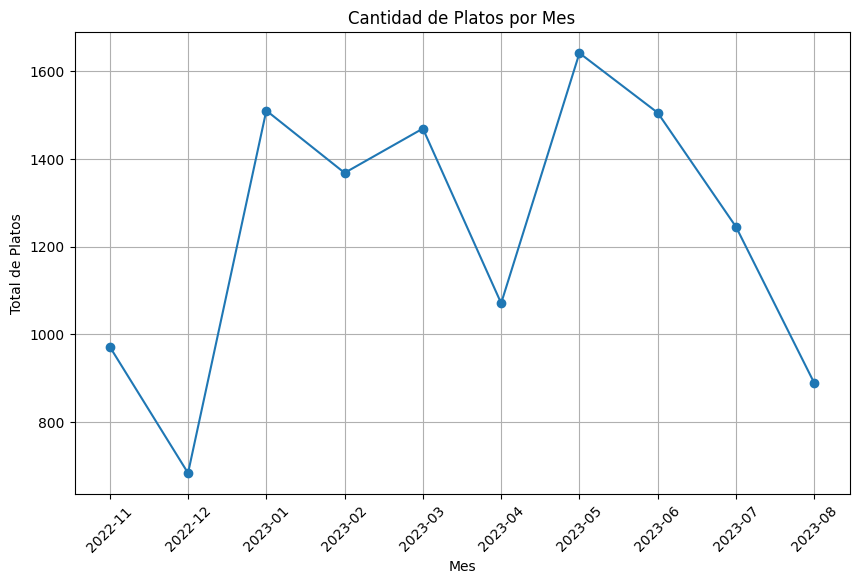

In [ ]:
import matplotlib.pyplot as plt

# Convertir 'anio_mes' en objetos de tipo string antes de graficar
Platos_mes.index = Platos_mes.index.astype(str)

plt.figure(figsize=(10,6))
plt.plot(Platos_mes.index, Platos_mes.values, marker='o')
plt.title('Cantidad de Platos por Mes')
plt.xlabel('Mes')
plt.ylabel('Total de Platos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()





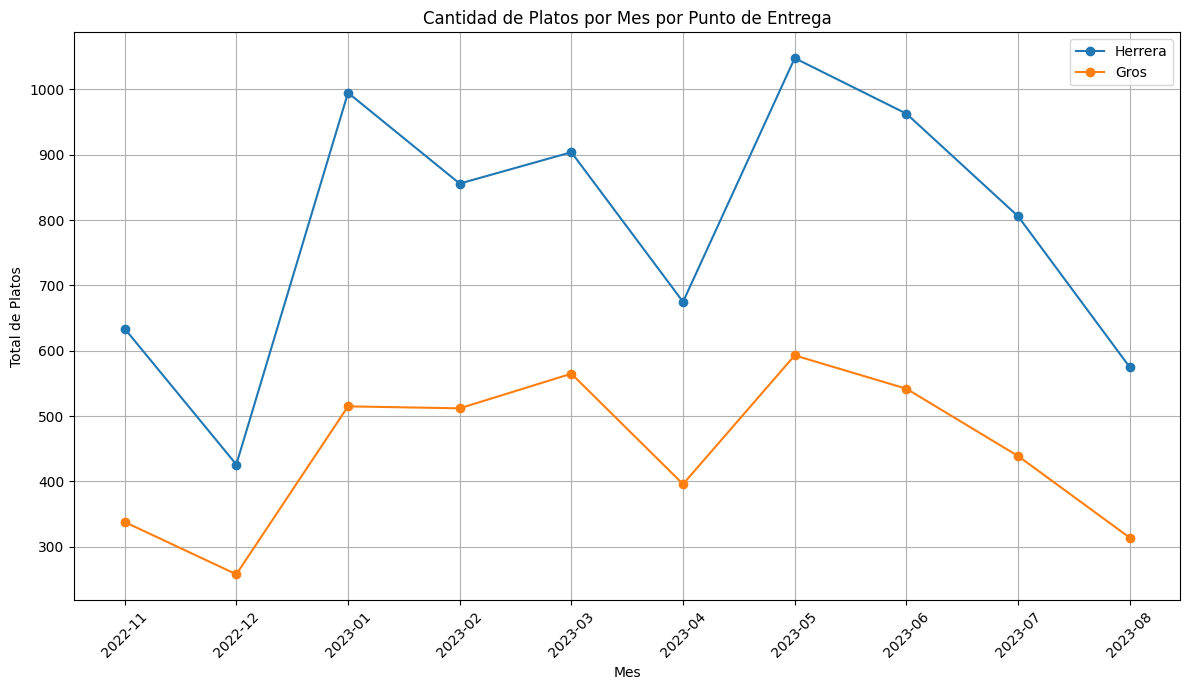

In [ ]:
# Filtramos los datos para cada punto de entrega
datos_herrera = datos[datos['pick_up_point_day1_id'] == "Herrera"]
datos_gros = datos[datos['pick_up_point_day1_id'] == "Gros"]

# Agrupamos por 'anio_mes' y contamos el número de filas en cada grupo para cada punto de entrega
Platos_mes_herrera = datos_herrera.groupby(['anio_mes']).size()
Platos_mes_gros = datos_gros.groupby(['anio_mes']).size()

# Convertir 'anio_mes' en objetos de tipo string antes de graficar
Platos_mes_herrera.index = Platos_mes_herrera.index.astype(str)
Platos_mes_gros.index = Platos_mes_gros.index.astype(str)

plt.figure(figsize=(12,7))
plt.plot(Platos_mes_herrera.index, Platos_mes_herrera.values, marker='o', label="Herrera")
plt.plot(Platos_mes_gros.index, Platos_mes_gros.values, marker='o', label="Gros")
plt.title('Cantidad de Platos por Mes por Punto de Entrega')
plt.xlabel('Mes')
plt.ylabel('Total de Platos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Historico de ventas semanales



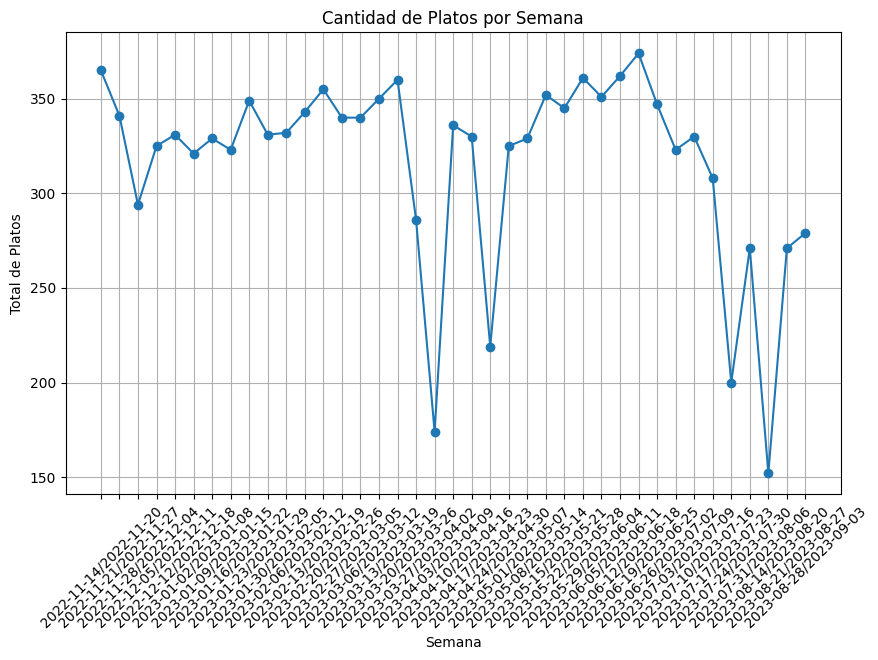

In [ ]:
# Extraer la semana del año de 'orders.created_at'
datos['semana_anio'] = datos['Fecha'].dt.to_period('W')

# Agrupar por 'order.id' y 'semana_anio' y contar el número de filas en cada grupo
Platos_semana = datos.groupby(['semana_anio']).size()

# Convertir 'semana_anio' en objetos de tipo string antes de graficar
Platos_semana.index = Platos_semana.index.astype(str)

plt.figure(figsize=(10,6))
plt.plot(Platos_semana.index, Platos_semana.values, marker='o')
plt.title('Cantidad de Platos por Semana')
plt.xlabel('Semana')
plt.ylabel('Total de Platos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


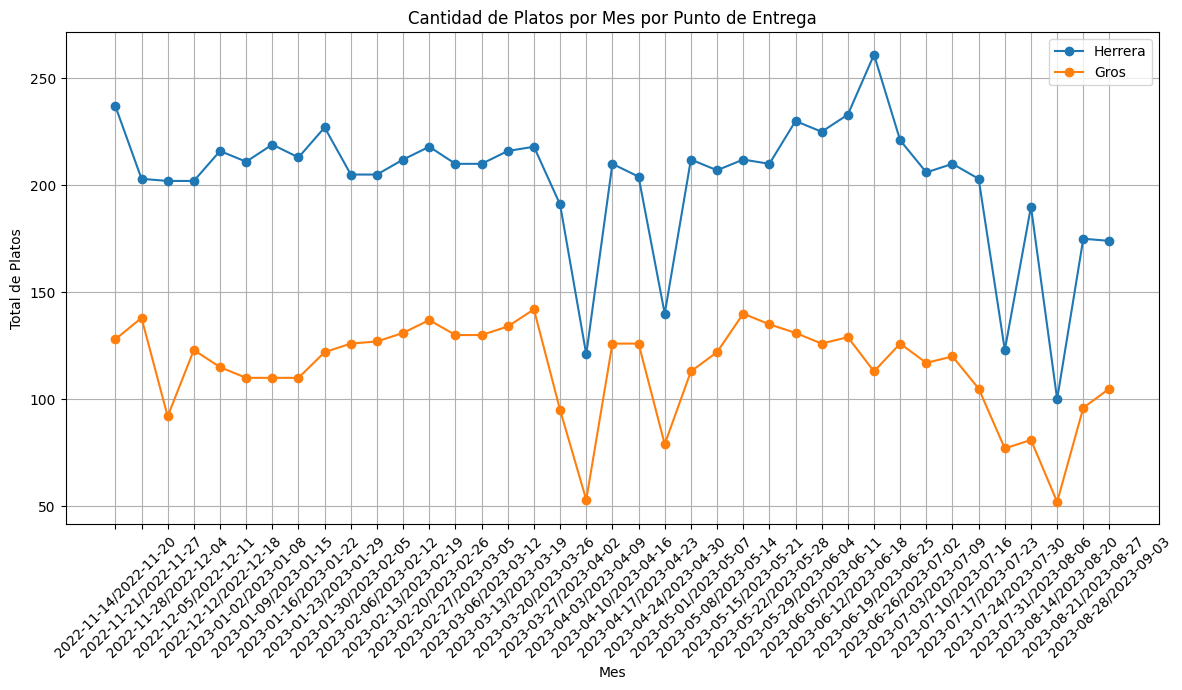

In [ ]:
# Filtramos los datos para cada punto de entrega
datos_herrera = datos[datos['pick_up_point_day1_id'] == "Herrera"]
datos_gros = datos[datos['pick_up_point_day1_id'] == "Gros"]

# Extraer la semana del año de 'orders.created_at'
datos['semana_anio'] = datos['Fecha'].dt.to_period('W')

# Agrupamos por 'anio_mes' y contamos el número de filas en cada grupo para cada punto de entrega
Platos_mes_herrera = datos_herrera.groupby(['semana_anio']).size()
Platos_mes_gros = datos_gros.groupby(['semana_anio']).size()

# Convertir 'anio_mes' en objetos de tipo string antes de graficar
Platos_mes_herrera.index = Platos_mes_herrera.index.astype(str)
Platos_mes_gros.index = Platos_mes_gros.index.astype(str)

plt.figure(figsize=(12,7))
plt.plot(Platos_mes_herrera.index, Platos_mes_herrera.values, marker='o', label="Herrera")
plt.plot(Platos_mes_gros.index, Platos_mes_gros.values, marker='o', label="Gros")
plt.title('Cantidad de Platos por Mes por Punto de Entrega')
plt.xlabel('Mes')
plt.ylabel('Total de Platos')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



```
# Tiene formato de código
```

## Top 10 de Platos

In [ ]:
from pandas.core.groupby.groupby import GroupBy

# Calcular la frecuencia de cada plato
top_10_platos= datos.groupby('Plato').size().sort_values(ascending=False).head(10)

top_10_platos

Plato
Barazki menestra || Menestra de verduras                    581
Dilistak || Lentejas                                        513
Entsaladilla errusiara || Ensaladilla rusa                  477
Pikillo beteak arrainez || Piquillos rellenos de pescado    469
Haragi gixatua || Carne guisada                             310
Txitxirioak || Garbanzos                                    302
Arrai pastela || pastel de pescado                          298
Bolognesa Pasta || Pasta Bolognesa                          298
Haragi bolak || Albondigas                                  295
Barazki pastela || Pastel de verduras                       291
dtype: int64

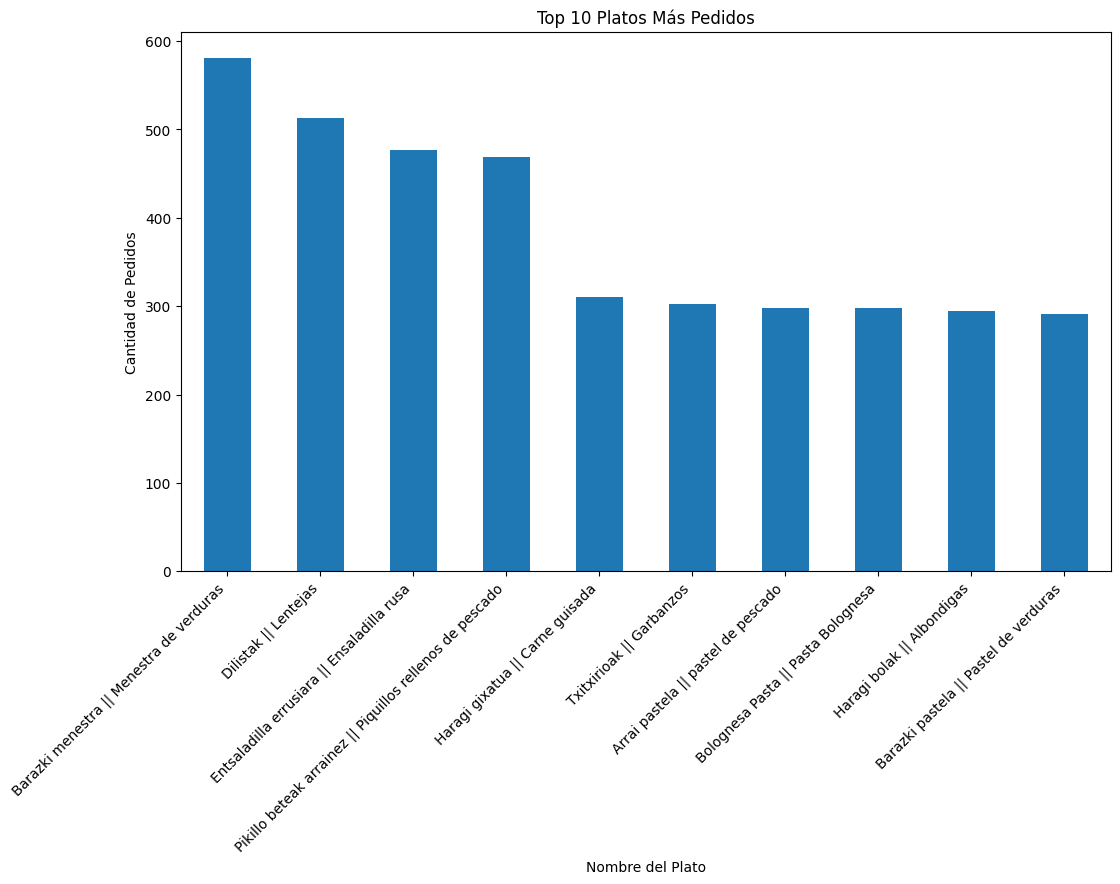

In [ ]:
# Grafico del top 10

top_10_platos.plot(kind='bar', figsize=(12,7))
plt.title('Top 10 Platos Más Pedidos')
plt.ylabel('Cantidad de Pedidos')
plt.xlabel('Nombre del Plato')
plt.xticks(rotation=45, ha='right')

plt.show()


# Pedidos por Punto Recogida

---



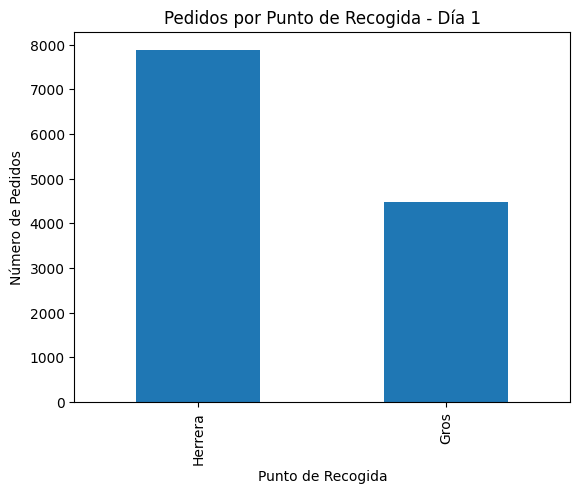

In [ ]:
pick_up_1 = datos.groupby('pick_up_point_day1_id').size().sort_values(ascending=False)
pick_up_1.plot(kind='bar', title='Pedidos por Punto de Recogida - Día 1')
plt.ylabel('Número de Pedidos')
plt.xlabel('Punto de Recogida')
plt.show()




## Distribucion por Punto de Recogida

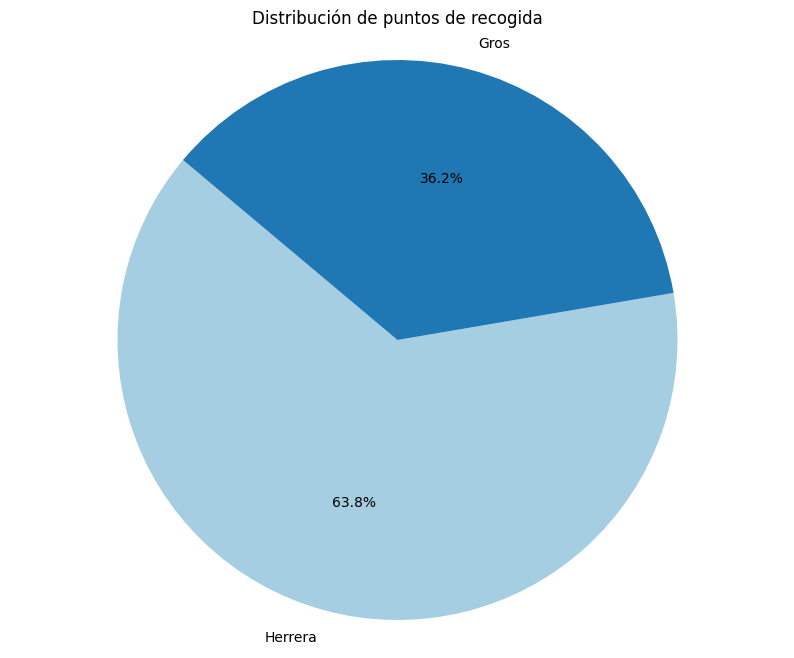

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada punto de recogida del día 1 y día 2
pick_up_counts_day1 = datos['pick_up_point_day1_id'].value_counts()
pick_up_counts_day2 = datos['pick_up_point_day2_id'].value_counts()

# Sumar las frecuencias para tener una cuenta total para cada punto de recogida
total_pick_up_counts = pick_up_counts_day1.add(pick_up_counts_day2, fill_value=0)

# Crear la gráfica de torta
labels = total_pick_up_counts.index
sizes = total_pick_up_counts.values
colors = plt.cm.Paired(range(len(labels)))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Asegura que se dibuje un círculo
plt.title('Distribución de puntos de recogida')
plt.show()


Pedidos por Horario de recogida

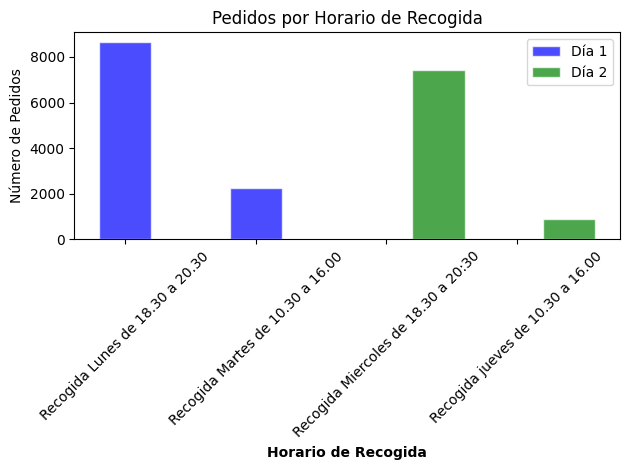

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos agrupados
orders_by_pickup_time_1 = datos.groupby('pick_up_time_day_1_id').size()
orders_by_pickup_time_2 = datos.groupby('pick_up_time_day_2_id').size()

# Asegurarnos de que los índices (horarios de recogida) coincidan
all_times = sorted(set(orders_by_pickup_time_1.index) | set(orders_by_pickup_time_2.index))

values_1 = [orders_by_pickup_time_1.get(time, 0) for time in all_times]
values_2 = [orders_by_pickup_time_2.get(time, 0) for time in all_times]

barWidth = 0.4
r1 = np.arange(len(values_1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, values_1, color='blue', width=barWidth, edgecolor='white', label='Día 1', alpha=0.7)
plt.bar(r2, values_2, color='green', width=barWidth, edgecolor='white', label='Día 2', alpha=0.7)

# Agregar etiquetas, título, leyenda y configuración de ejes
plt.xlabel('Horario de Recogida', fontweight='bold')
plt.xticks(r1, all_times, rotation=45)


plt.ylabel('Número de Pedidos')
plt.title('Pedidos por Horario de Recogida')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Filtrado para "Herrera"
herrera_day1 = datos[(datos['pick_up_point_day1_id'] == 'Herrera') & (datos['pick_up_time_day_1_id'].notnull())]
herrera_day2 = datos[(datos['pick_up_point_day2_id'] == 'Herrera') & (datos['pick_up_time_day_2_id'].notnull())]

# Filtrado para "Gros"
gros_day1 = datos[(datos['pick_up_point_day1_id'] == 'Gros') & (datos['pick_up_time_day_1_id'].notnull())]
gros_day2 = datos[(datos['pick_up_point_day2_id'] == 'Gros') & (datos['pick_up_time_day_2_id'].notnull())]


In [ ]:
herrera_day1_grouped = herrera_day1.groupby('pick_up_time_day_1_id').size()
herrera_day2_grouped = herrera_day2.groupby('pick_up_time_day_2_id').size()

gros_day1_grouped = gros_day1.groupby('pick_up_time_day_1_id').size()
gros_day2_grouped = gros_day2.groupby('pick_up_time_day_2_id').size()


## Horarios de entrega vs Punto de entregas

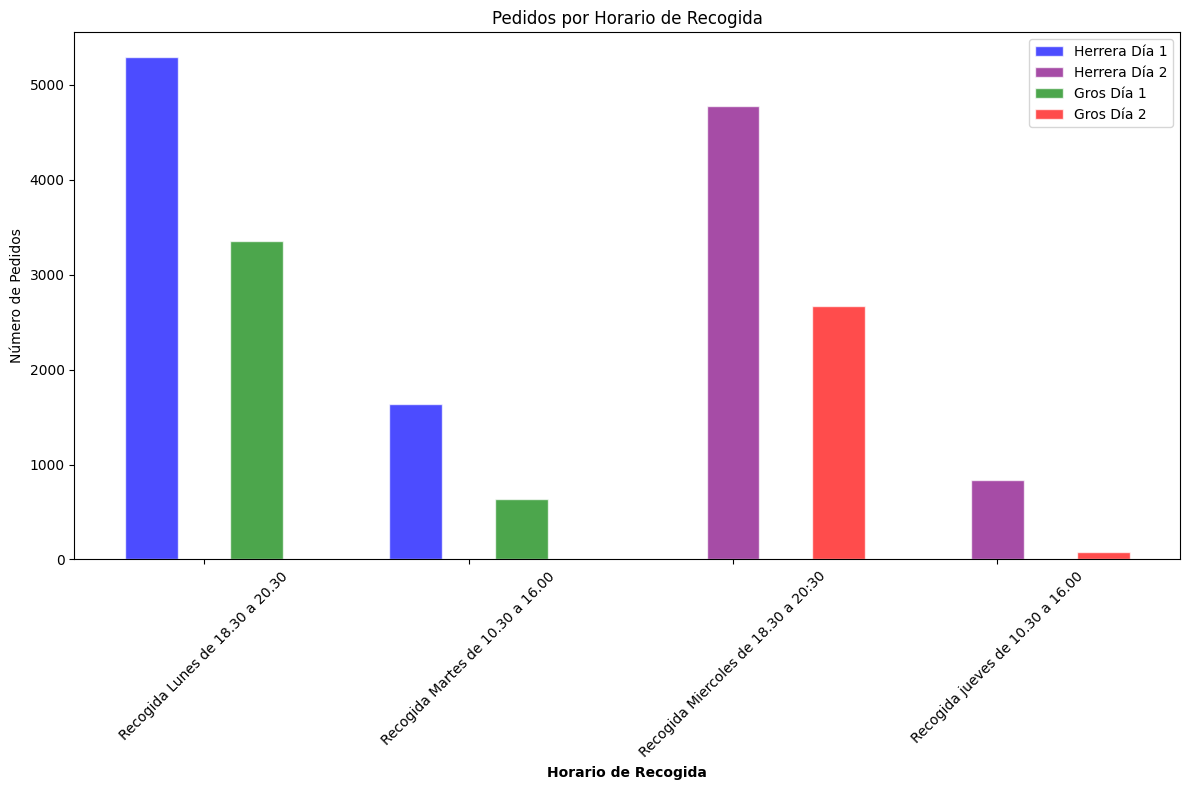

In [ ]:
all_times = sorted(set(herrera_day1_grouped.index) | set(herrera_day2_grouped.index) | set(gros_day1_grouped.index) | set(gros_day2_grouped.index))

values_herrera_1 = [herrera_day1_grouped.get(time, 0) for time in all_times]
values_herrera_2 = [herrera_day2_grouped.get(time, 0) for time in all_times]
values_gros_1 = [gros_day1_grouped.get(time, 0) for time in all_times]
values_gros_2 = [gros_day2_grouped.get(time, 0) for time in all_times]

barWidth = 0.2
r1 = np.arange(len(values_herrera_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.figure(figsize=(12, 8))

plt.bar(r1, values_herrera_1, color='blue', width=barWidth, edgecolor='white', label='Herrera Día 1', alpha=0.7)
plt.bar(r2, values_herrera_2, color='purple', width=barWidth, edgecolor='white', label='Herrera Día 2', alpha=0.7)
plt.bar(r3, values_gros_1, color='green', width=barWidth, edgecolor='white', label='Gros Día 1', alpha=0.7)
plt.bar(r4, values_gros_2, color='red', width=barWidth, edgecolor='white', label='Gros Día 2', alpha=0.7)

# Configuraciones adicionales
plt.xlabel('Horario de Recogida', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(values_herrera_1))], all_times, rotation=45)
plt.ylabel('Número de Pedidos')
plt.title('Pedidos por Horario de Recogida')
plt.legend()

plt.tight_layout()
plt.show()


## Distribución por Horario de recogida

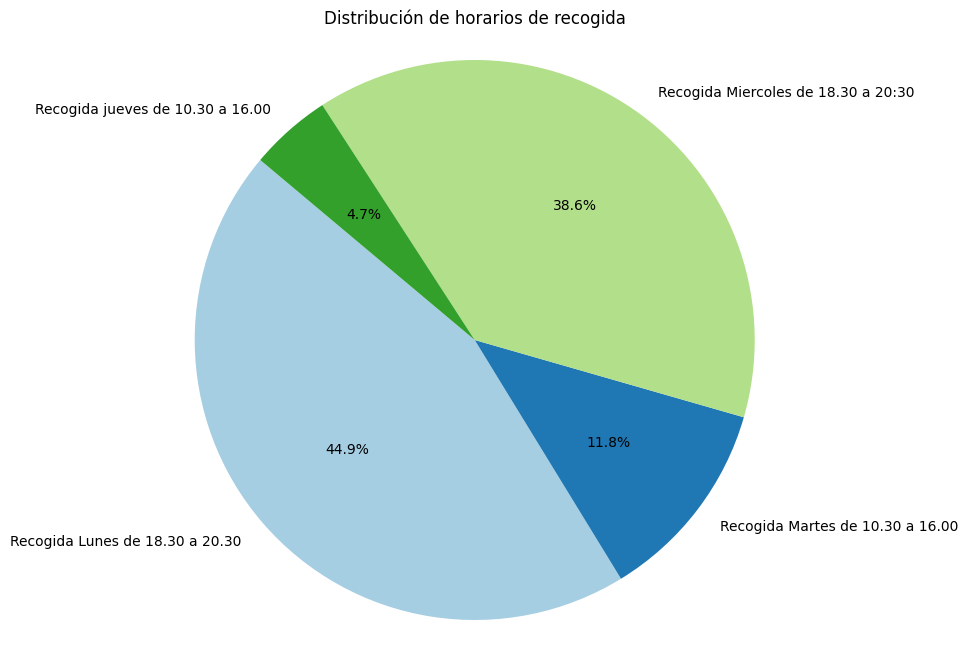

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada horario de recogida del día 1 y día 2
pick_up_time_counts_day1 = datos['pick_up_time_day_1_id'].value_counts()
pick_up_time_counts_day2 = datos['pick_up_time_day_2_id'].value_counts()

# Sumar las frecuencias para tener una cuenta total para cada horario de recogida
total_pick_up_time_counts = pick_up_time_counts_day1.add(pick_up_time_counts_day2, fill_value=0)

# Crear la gráfica de torta
labels = total_pick_up_time_counts.index
sizes = total_pick_up_time_counts.values
colors = plt.cm.Paired(range(len(labels)))

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Asegura que se dibuje un círculo
plt.title('Distribución de horarios de recogida')
plt.show()
